# 지도학습과 비지도학습의 차이 : 종속변수 유무 
## 비지도학습 -> 차원축소, target 결정

# vector 와 matrix 를 통해 데이터를 표현한다.
# vector 의 크기, 방향을 이용해서 문제해석
### vector 의 크기를 중심으로 문제해석 : kmeans, knn
### vector 의 방향을 중심으로 문제해석 : PCA, MDS, FNN


######kmeans : 비지도학습이므로 종속변수 없다, 데이터가까운 것끼리 그룹핑한다/ 
#           center 점을 정해주고 데이터 들어온다-> 지속적으로 center 점이 움직여가면서 군집화 하는 것!!
#            문제점 : 데이터도 모르는데 중심값을 정하는 게 문제다. 이상치에 영향을 많이 받는다.(그래서 나온것이 median kmeans) , 
#            활용되는 곳 : 종속변수를 결정한다 (종속변수가 없으면 지도학습을 할 수 없다, 종속변수를 결정하는데 사용하는 것이 kmeans) , 압축용으로 사용(이미지같은것들, color 값을 몇개 빼서 비슷한 것끼리 군집화함, 군집주변에 있는 놈들은 번호하나로 부여)
#                          원형이상치 제거 , 챗봇같은것에서 활용(예를 들어서 챗봇을 만든다 모든문제에 다 응답하게 하려면 속도가 느려짐, 들어온 대화에 대해 그룹핑을 해준다 ( 앞단에서 kmeans 가 돌아가서 경제문제챗봇, iT 문제 챗봇, 이런식으로 분할시켜줌-) )

######knn    :  미리학습된 데이터 분포가 있다. 새로운 데이터가 들어온다면 가장 가까운 데이터를 몇 개를 확인해본다. 그래서 맞는 군집에 분류해준다, KNN 은 속도가 빠르다( 그래서 결측치의 값을 빠르게 찾아줌)

######PCA    : 들어오는 데이터로부터, 데이터들의 상관계수나 공분산을 구한다. 이를 통해서 변수간의 다중공선성, 종속변수에 얼마나 영향을 미치는지 확인해본다
#              상관계수나 공분산행렬에 고유값분해를 하게되면 고유값 과 고유벡터가 나온다 ,  model 전단계에서 사용하며 노이즈제거하는 용도이다(대표적인것 : IOT, AIOT )

######MDS    : 시각화용도로 사용되어진다 ,  50x10 이 있는데 여기에 10x2 의 임의의 직교행렬을 곱한다-> 그럼 변수(특성) 축소된다 -> 데이터가 정직교하는 축으로 재해석되는데 이때 시각화를 통해 확인해봐라!!

######FNN    : 이건 그냥 모델이다. 가중치를 학습하는 신경망이다. (행렬을 이용해 문제를 풀어나감)

#PCA -> 노이즈제거, MDS -> 시각화용도,  FNN -> 모델



# matrix -> 데이터변환용으로 쓴다,  차원축소되는 용도로 쓰인다(=특징을 추출한다)  

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
# 이미지를 화일로 출력하고 
def make_hello(N=1000, rseed=42):
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'jinwook', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)   

    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T   
    print("이미지차원", data.shape)
   
    print(data)
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    print("만든 갯수",X.shape)
    print((X * data.shape).shape)
    i, j = (X * data.shape).astype(int).T
   
    mask = (data[i, j] < 1)
    X = X[mask]
    print("새로운X갯수", X.shape)
    print("원래이미지의 차수 ", data.shape)
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]

    return X[np.argsort(X[:, 0])]
 

이미지차원 (288, 72)
[[0.14901961 0.14901961 0.14901961 ... 1.         1.         1.        ]
 [0.14901961 0.14901961 0.14901961 ... 1.         1.         1.        ]
 [0.14901961 0.14901961 0.14901961 ... 1.         1.         1.        ]
 ...
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]
만든 갯수 (4000, 2)
(4000, 2)
새로운X갯수 (1544, 2)
원래이미지의 차수  (288, 72)


(-0.20958628725849313,
 4.20520327441312,
 -0.05416859218496992,
 1.0026171453373032)

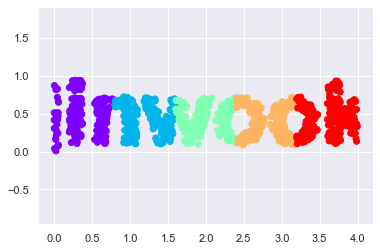

In [11]:
X = make_hello(1000)
colorize = dict(c = X[:, 0], cmap = plt.cm.get_cmap('rainbow', 5))

plt.scatter(X[:,0], X[:,1], **colorize)
plt.axis('equal')

(1000, 2)
<class 'list'>


(4.495073115637055, 8.909063112601789, 4.892892358803678, 7.269881115844726)

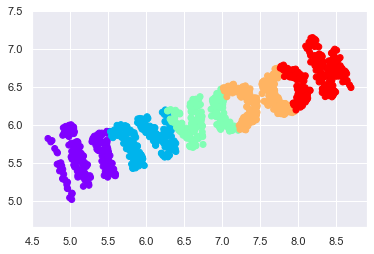

In [57]:
print(X.shape)
def rotate(X, angle):
    theta = np.deg2rad(angle)  # 라디안 호의 길이
    
    R = [[np.cos(theta), np.sin(theta)],        # 2차원 행렬회전
        [-np.sin(theta), np.cos(theta)]]            
    print(type(R))
    return np.dot(X, R)
X2 = rotate(X, 20)+5
plt.scatter(X2[:,0], X2[:, 1], **colorize)
plt.axis('equal')

(1000, 1000)


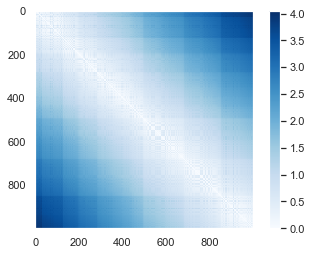

In [58]:
# 각 점들간의 상호거리()

from sklearn.metrics import pairwise_distances       #  디폴트 -> 유클리디안 거리 
D = pairwise_distances(X)
print(D.shape)
D[:5, :5]
plt.imshow(D, zorder = 2, cmap = 'Blues', interpolation = 'nearest')
plt.colorbar()

In [59]:
D2 = pairwise_distances(X2)
np.allclose(D,D2)  #  원형을 유지하고 있음


True

[[-1.61429014 -1.26298934]
 [-1.67071966 -1.18843075]
 [-1.54355674 -1.35100414]
 ...
 [ 1.47043296  1.26638197]
 [ 1.59859142  1.10651869]
 [ 1.61621329  1.08969067]]


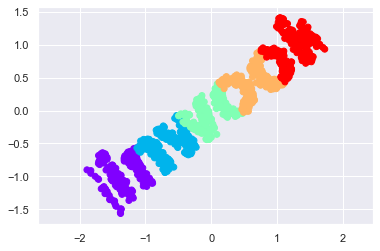

In [60]:
from sklearn.manifold import MDS
# 미리 계산된 거리행렬을 이용해 차원 축소함
model = MDS(n_components = 2, dissimilarity = 'precomputed', 
           random_state = 1)
out = model.fit_transform(D)
plt.scatter(out[:,0], out[:, 1], **colorize)
plt.axis('equal')
print(out)

In [61]:
import numpy as np 
rng = np.random.RandomState(10) #  seed 어디에서 시작하는가?
C = rng.randn(3,3)                # 정규분포 3바이 3으로 만든 행렬
print(np.dot(C,C.T))                    # T = 전치행렬 
# 정방행렬이면서 대칭행렬이 나온다. 
# 고유값 분해를 했다. 
e, V = np.linalg.eigh(np.dot(C,C.T))
print('eigenvector', V)    # 고유벡터와
print('eigenvalue', e)       # 고유값
np.dot(V[1], V[2])      #  두 벡터의 내적

[[4.67300869 1.54608517 0.42456214]
 [1.54608517 0.9046519  0.0621289 ]
 [0.42456214 0.0621289  0.0822976 ]]
eigenvector [[-0.15797077 -0.30570231 -0.93893095]
 [ 0.20981122  0.9187662  -0.33443672]
 [ 0.9648961  -0.24982947 -0.08099843]]
eigenvalue [0.02629875 0.37332691 5.26033253]


-3.122502256758253e-17

In [62]:
# 2차원에서 3차원으로 변환
def random_projection (X, dimension = 3, rseed = 42):
    assert dimension >= X.shape[1]    # 행, 열(2차원)==> 차원확대만
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension)     # 3*3 행렬
    print('C는', C.shape)   
    print(np.dot(C, C.T)) # 정방행렬이면서 대칭행렬이 만들어진다. 
    e,V = np.linalg.eigh(np.dot(C,C.T))   # 고유치 , 고유벡터
    print('V는', V.shape)
    print('차원은', V[:X.shape[1]])  # 2차원
    return np.dot(X, V[:X.shape[1]]) # 3*2 변환

print(X.shape)
print(X.shape[1])
print('데이터의 차원은 ', X.shape)
X3 = random_projection(X,3)
X3.shape

(1000, 2)
2
데이터의 차원은  (1000, 2)
C는 (3, 3)
[[0.68534241 0.63723771 0.37423535]
 [0.63723771 2.42926786 2.33541214]
 [0.37423535 2.33541214 3.30327538]]
V는 (3, 3)
차원은 [[-0.63360361  0.75939282  0.14788172]
 [ 0.64803399  0.41652241  0.63762139]]


(1000, 3)

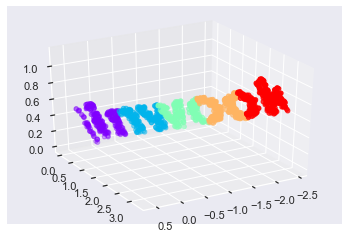

In [63]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection = '3d')
ax.scatter3D(X3[:, 0], X3[:,1], X3[:,2], **colorize)
ax.view_init(azim = 60 , elev = 30) # 3차원에서 카메라의 각도 

(-2.078214561743209,
 1.914959091595823,
 -1.7285732149085522,
 1.5745163361850434)

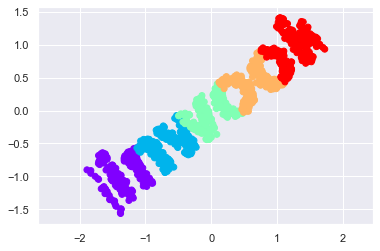

In [64]:
model = MDS(n_components =2, random_state = 1)
out3 = model.fit_transform(X3)
plt.scatter(out3[:,0], out3[:,1], **colorize)
plt.axis('equal')

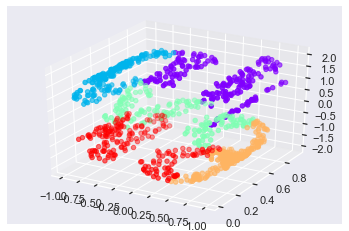

In [65]:
def make_hello_s_curve(X):
    t = (X[:, 0]-2)* 0.75 *np.pi
    x = np.sin(t)
    y = X[:,1]
    z = np.sign(t) * (np.cos(t)- 1)  #sign == +, -
    return np.vstack((x,y,z)).T

XS = make_hello_s_curve(X)
ax = plt.axes(projection = '3d')
ax.scatter3D(XS[:,0], XS[:, 1], XS[:,2], **colorize) 
# MDS는 비 선형에 취약하다
# 선형에는 강하지만 

(-2.162342330151507, 2.072517168421788, -1.8197267173822658, 1.77811826875244)

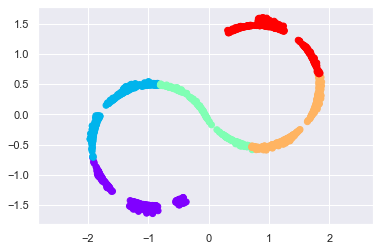

In [66]:
# MDS는 비선형에서 모양유지가 안된다. 
model = MDS(n_components =2, random_state = 1)
out3 = model.fit_transform(XS)
plt.scatter(out3[:,0], out3[:,1], **colorize)
plt.axis('equal')

# LLE(Locally linear embedding) MDS가 안되는 비선형에 강한 LLE
- 비선형에 강함

(0.15, -0.15)

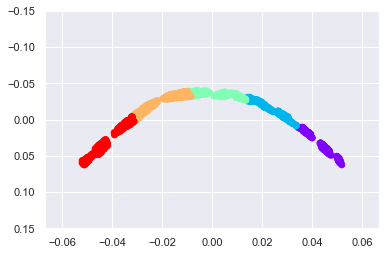

In [67]:
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors = 100, n_components = 2,
                              method = 'modified', eigen_solver = 'dense')
out = model.fit_transform(XS)
fig,ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], **colorize)
ax.set_ylim(0.15, -0.15)

C:\Users\ICT01_12\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_12\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_12\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_12\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_12\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ICT01_12\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 5089

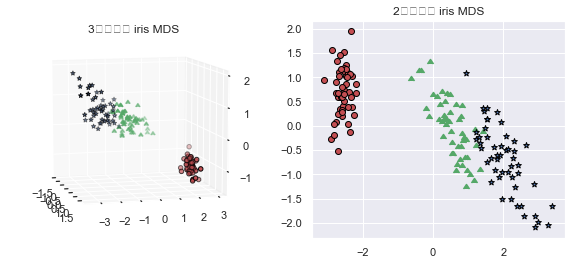

In [73]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn import manifold       #  다형체 
from matplotlib import pylab
from sklearn.manifold import MDS
from mpl_toolkits import mplot3d
import os       # 디렉터리 관리 
CHART_DIR = './'
colors = ['r','g','b']
markers = ['o', 6, '*']
def plot_iris_mds():
    iris = load_iris()
    X = iris.data
    y = iris.target
    fig = pylab.figure(figsize=(10, 4))
    ax = fig.add_subplot(121, projection='3d') # 변수가 4개인데 3개로 표현해라
    ax.set_facecolor('white')
    mds = manifold.MDS(n_components=3)
    Xtrans = mds.fit_transform(X)  # 150*3
    for cl, color, marker in zip(np.unique(y), colors, markers):
        ax.scatter(
            Xtrans[y == cl][:, 0], Xtrans[y == cl][:, 1], Xtrans[y == cl][:, 2], c=color, marker=marker, edgecolor='black')
    pylab.title("3차원에서 iris MDS")
    ax.view_init(10, -15)     # 카메라 각도 조절

    mds = manifold.MDS(n_components=2)
    Xtrans = mds.fit_transform(X)

    ax = fig.add_subplot(122)
    for cl, color, marker in zip(np.unique(y), colors, markers):
        ax.scatter(
            Xtrans[y == cl][:, 0], Xtrans[y == cl][:, 1], c=color, marker=marker, edgecolor='black')
    pylab.title("2차원에서 iris MDS")

    filename = "mds_demo_iris.png"
    pylab.savefig(os.path.join(CHART_DIR, filename), bbox_inches="tight") 
plot_iris_mds()

# kmeans : 군집분석 => 종속변수결정
- 압축: 팔레트에다가 물감을 짜듯이 RGB컬러를 만들어 놓는다. 
    --> 그 다음에 실제 데이터에는 팔레트번호(256)-> 1바이트로 표현가능 
- 원형이상치 제거 
- 쳇봇에서 미리 군집화를 이용해서 문제 해결에 도움을 준다.

### 알고리즘 - k값을 결정(군집수 결정), 중심값을 줘야한다. 
- 문제점 : 이상치에 민감하다. , 중심값이 변해서 계속 재계산 해줘야함. 
### k-means의 척도 : 거리값
- 거리값은 (피타고라스 정리)--> 유클리디안 디스턴스 
### DBSCAN : EPS기본 거리값, 군집이 되기 위한 최소 요소수 
- 근거리에 있는 놈들끼리 군집을 이루어 간다. 
- 핵심값 , 경계값. 어느 군집에도 속하지 않는 것, 

In [80]:
import numpy as np
import scipy
import sklearn.metrics.pairwise

a_64 = np.array([61,22,71,60, -65.755], dtype = np.float64)
b_64 = np.array([61,22,71,608,-65.72], dtype = np.float64)
a_32 = a_64.astype(np.float32)
b_32 = b_64.astype(np.float32)

dist_64_np = np.array([np.linalg.norm(a_64 - b_64)], dtype = np.float64)
dist_32_np = np.array([np.linalg.norm(a_32 - b_32)], dtype = np.float32)
dist_64_sklearn = sklearn.metrics.pairwise.pairwise_distances([a_64], [b_32], metric = 'manhattan')


In [92]:
from sklearn.svm import SVC  # 분류 서포트 벡터머신
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler   # kmeans, PCA 전처리에 민감 

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test= train_test_split(
cancer.data, cancer.target, random_state = 0)

scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
svm = SVC()
svm.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
print('테스트 점수: {:.2f}'.format(svm.score(X_test_scaled,
                                       y_test)))

테스트 점수: 0.95


C:\Users\ICT01_12\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [93]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.001 ,0.01, 0.1, 1 , 10, 100],
             'gamma':[0.001,0.01,0.1, 1,10,100]}
grid = GridSearchCV(SVC(), param_grid = param_grid, cv= 5 )
grid.fit(X_train_scaled, y_train)
print('최상의 교차 검증 정확도:{:.2f}'.format(grid.best_score_))
print('테스트 점수:{:.2f}'.format(grid.score(X_test_scaled, y_test)))
print('최적의 매개변수:', grid.best_params_)

최상의 교차 검증 정확도:0.98
테스트 점수:0.97
최적의 매개변수: {'C': 1, 'gamma': 1}


In [94]:
from sklearn.pipeline import Pipeline
# 참조: 파라메타를 전달하기 위해서 참조 이름을 써놓는다. 
pipe = Pipeline([('scaler', MinMaxScaler()), ('svm',SVC())])
pipe.fit(X_train, y_train)
print('테스트 점수:{:.2f}'.format(pipe.score(X_test, y_test)))

테스트 점수:0.95


C:\Users\ICT01_12\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [95]:
# pipeline +GridSearchCV은 다양한 테스트 문제를 해결. 
from sklearn.model_selection import GridSearchCV
# regularization 규제: 과적합을 방지하는것임 이때 지금 준게
# 바로 아래의 C임  # 처음에는 범위의 스펙트럼을 넓게해서 대충준다. 
param_grid = {'svm__C':[0.001 ,0.01, 0.1, 1 , 10, 100],
             'svm__gamma':[0.001,0.01,0.1, 1,10,100]}
grid = GridSearchCV(pipe, param_grid = param_grid, cv= 5 )
grid.fit(X_train_scaled, y_train)
print('최상의 교차 검증 정확도:{:.2f}'.format(grid.best_score_))
print('테스트 점수:{:.2f}'.format(grid.score(X_test_scaled, y_test)))
print('최적의 매개변수:', grid.best_params_)

최상의 교차 검증 정확도:0.98
테스트 점수:0.97
최적의 매개변수: {'svm__C': 1, 'svm__gamma': 1}


In [1]:
# k-means 
# 초기 중심값이 결정 
#  kmeans에서 알아서 램덤하게 중심값을 준다. 
# 중심값은 지속적으로 변화 고정이 될때까지;
from sklearn import cluster, datasets
import seaborn as sns
%matplotlib inline
iris = datasets.load_iris()
X = iris.data[:,:2]    # 전체 변수 4개중에 2개만 사용
y_iris = iris.target
km2 = cluster.KMeans(n_clusters = 2).fit(X)
km3 = cluster.KMeans(n_clusters = 3).fit(X)
km4 = cluster.KMeans(n_clusters = 4).fit(X)
plt.figure(figsize = (9,3))
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c= km2.labels_)  # 컬러 2개 kmeans결과 두개의 군집으로 나누어라ㅣ 따라서 두개의 컬러값으로 들어간다. 
plt.title('K=2, J= %.2f' % km2.inertia_)  # 군집 내부거리값. 
plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c= km3.labels_)
plt.title('K=3, J= %.2f' % km3.inertia_)
plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c= km4.labels_)
plt.title('K=4, J= %.2f' % km4.inertia_)
km4.cluster_centers_ # 중심값 출력

NameError: name 'plt' is not defined

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

[[7 5]
 [5 7]
 [7 7]
 [4 4]
 [4 6]
 [1 4]
 [0 0]
 [2 2]
 [8 7]
 [6 8]
 [5 5]
 [3 7]]


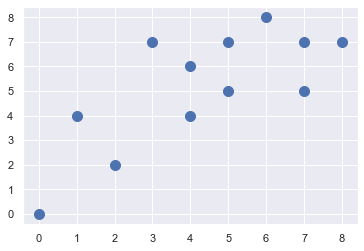

In [103]:
X = np.array([[7,5], [5,7], [7,7], [4,4], [4,6], [1,4], [0,0], [2,2], 
             [8,7], [6,8], [5,5], [3,7]])
print(X)
plt.scatter(X[:,0], X[:,1], s= 100)
plt.show()

12


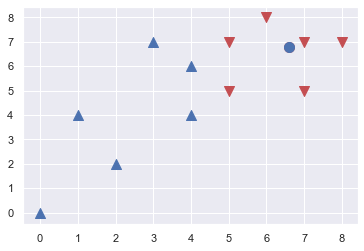

In [108]:
from sklearn.cluster import KMeans
# 레이블: 군집번호 : 종속변수
model = KMeans(n_clusters = 2, init = 'random', n_init = 1, max_iter = 1, random_state = 1).fit(X)
c0, c1 = model.cluster_centers_
print(len(model.labels_))
#boolean index
plt.scatter(X[model.labels_==0,0], X[model.labels_==0,1], s = 100, marker = 'v', c = 'r')
plt.scatter(X[model.labels_==1,0], X[model.labels_==1,1], s = 100, marker = '^', c = 'b')
plt.scatter(c0[0], c0[1], s = 100, c= 'r')
plt.scatter(c0[0], c0[1], s = 100, c= 'b')
plt.show()

In [110]:
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

In [114]:
from matplotlib import font_manager , rc
font_name = font_manager.FontProperties(
fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family = font_name)

In [134]:
n_colors = 255
# 1바이트 = 8비트 = 표현종류 = > 256
china = load_sample_image('flower.jpg')  #RGB 1바이트
china = np.array(china, dtype = np.float64)/255

In [135]:
w,h,d = original_shape = tuple(china.shape) # 이미지 사이즈가 행과열, 그리고  d가 컬러값 들어 있어서 3개임. 
print(w,h,d)
assert d ==3  #RGB만 들어와라
image_array = np.reshape(china, (w*h,d))  #2차원으로 변환

427 640 3


In [136]:
image_array_sample = shuffle(image_array, random_state = 0)[0:1000]
# n_colors = 64개 64개로 그룹핑 해라. 64,컬러로 군집화 시킴. 
kmeans = KMeans(n_clusters = n_colors, random_state = 0).fit(
image_array_sample)  # 64개의 중심값 결정. 

In [137]:
labels = kmeans.predict(image_array)  #라벨 427 *640

In [138]:
def recreate_image(codebook, labels, w, h): # 64컬러값으로 만든 코드북, 이미지픽셀수. 
    d = codebook.shape[1]
    image = np.zeros((w,h,d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

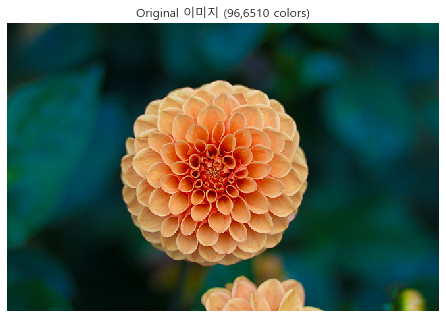

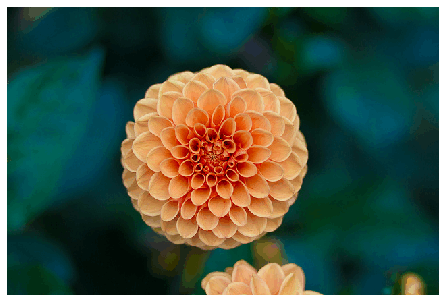

In [139]:
plt.figure(1)
plt.clf()
ax = plt.axes([0,0,1,1])
plt.axis('off')
plt.title('Original 이미지 (96,6510 colors)')
plt.imshow(china)
plt.figure(2)
plt.clf()
ax = plt.axes([0,0,1,1])
plt.axis('off')
# 64 칼러 
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

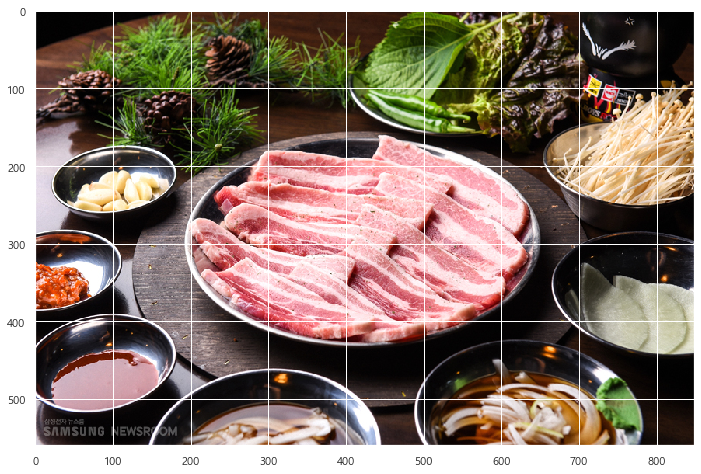

In [143]:
image = plt.imread('food.jpg')
plt.figure(figsize = (15,8))
plt.imshow(image)

In [144]:
image.shape

(560, 849, 3)

In [145]:
# 전체 바이트 수
image.shape[0]*image.shape[1]*image.shape[2]

1426320

In [146]:
x,y,z = image.shape
image = np.array(image, dtype = np.float64)/255
image_2d = image.reshape(x*y, z)  # kmeasn는 3차원을 이해못해 그래서 2차원으로 바꿔줘야한다. 
image_2d.shape

(475440, 3)

In [147]:
# 칼러를 16개로 클러스터링

kmeans_cluster = cluster.KMeans(n_clusters = 16)
kmeans_cluster.fit(image_2d)
cluster_centers = kmeans_cluster.cluster_centers_
cluster_centers

array([[0.54240592, 0.23731558, 0.1226004 ],
       [0.59820939, 0.53842034, 0.5405387 ],
       [0.11869137, 0.0933781 , 0.06654712],
       [0.98921739, 0.93426703, 0.93495068],
       [0.85213159, 0.55413626, 0.49331651],
       [0.95600333, 0.68472435, 0.66947233],
       [0.76345225, 0.38167624, 0.29111865],
       [0.39601519, 0.49587438, 0.14143344],
       [0.94583451, 0.82319583, 0.80908198],
       [0.5664607 , 0.67615798, 0.32905415],
       [0.46416083, 0.40126735, 0.39740673],
       [0.03569609, 0.02514862, 0.02228586],
       [0.24074109, 0.30866068, 0.05118025],
       [0.23413357, 0.14659075, 0.10313739],
       [0.76924401, 0.70947477, 0.67821298],
       [0.30930695, 0.25789982, 0.24339573]])

In [148]:
len(cluster_centers)

16

In [149]:
cluster_centers.shape

(16, 3)

In [151]:
cluster_labels = kmeans_cluster.labels_
cluster_labels

array([11, 11, 11, ...,  2,  2,  2])

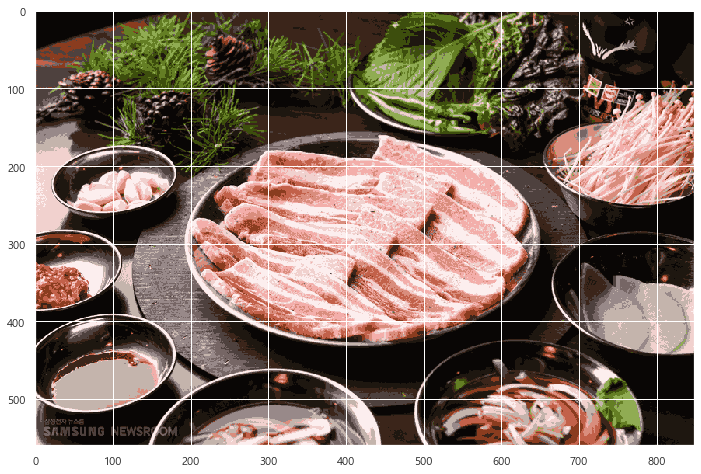

In [152]:
plt.figure(figsize= (15,8))
plt.imshow(cluster_centers[cluster_labels].reshape(x,y,z))

In [156]:
from sklearn.datasets import make_blobs
X, label = make_blobs(100, centers = 1) # 중심이 하나인 데이터 100개

In [161]:
kmeans = KMeans(n_clusters = 1)          #중심 1개
kmeans.fit(X) 
distances = kmeans.transform(X)  # 각 데이터의 중심으로 부터의 거리값으로 변환
sorted_idx = np.argsort(distances.ravel())[::-1][:5]  # ravel 1차원으로 만들때 
# argsort ==> 인덱스를 정렬해라. 
# 내림차순으로 변경해라 그중에서 5개?

3

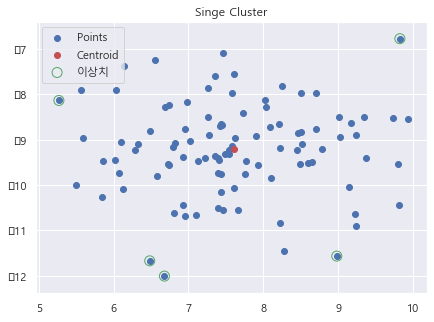

In [160]:
f, ax = plt.subplots(figsize = (7,5))
ax.set_title('Singe Cluster')
ax.scatter(X[:,0], X[:,1], label = 'Points')
ax.scatter(kmeans.cluster_centers_[:,0],
          kmeans.cluster_centers_[:,1],
          label = 'Centroid', color = 'r')
ax.scatter(X[sorted_idx][:,0],
          X[sorted_idx][:,1],
          label = '이상치', edgecolors ='g',
          facecolors = 'none', s= 100)
ax.legend(loc = 'best')

In [169]:
# PCA: 주성분 분석
# 모델의 입력 전단에서 특징추출 ( noise 제거)
# PCA의 결과를 모델의 변수로 추가하면서 정확도 상승. 
import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1,-1], [-2,-1], [-3,-2], [1,1], [2,1], [3,2]])
pca = PCA(n_components = 2)
pca.fit(X)
print(pca.explained_variance_ratio_) # 설명력 
# 차원축소후에 분석을 하면 좋은점
# - 노이즈 제거
# - 속도개선
# - 차원의 저주 => 복잡한 문제를 해결 가능. 

print(pca.explained_variance_)  # 분산이 큰겂이 주성분 값. 
print(pca.noise_variance_)

[0.99244289 0.00755711]
[7.93954312 0.06045688]
0.0


In [170]:
# svd --> 희소행렬에서 특징을 추출할때 사용한다. 
# svd로 구성됨 --> PCA ---> ful 은 전부 계산해라
# 500* 500 이라면 --> randomized 를 사용
# arpack ? 뭐

pca = PCA(n_components = 2, svd_solver = 'full') #randomized
#singular value decomposition
pca.fit(X)
print(pca.explained_variance_ratio_)

[0.99244289 0.00755711]


In [179]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
print(cancer.feature_names)
print(type(cancer))
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state =1)
print(type(X_train))
print(X_train.shape)
print(X_train.dtype)
print(X_test.shape)


['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
<class 'sklearn.utils.Bunch'>
<class 'numpy.ndarray'>
(426, 30)
float64
(143, 30)


In [180]:
from sklearn.svm import SVC
svm = SVC(C= 100)
svm.fit(X_train, y_train)
print('테스트 세트 정확도:{:.2f}'.format(svm.score(X_test, y_test)))

테스트 세트 정확도:0.62


C:\Users\ICT01_12\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [181]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [182]:
svm.fit(X_train_scaled, y_train )
print('스케일 조정된 테스트 세트의 정확도:{:.2f}'.format(svm.score(X_test_scaled, y_test)))

스케일 조정된 테스트 세트의 정확도:0.97


C:\Users\ICT01_12\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [194]:
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

[4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]
원본 데이터 형태:(569, 30)
축소된 데이터 형채:(569, 30)


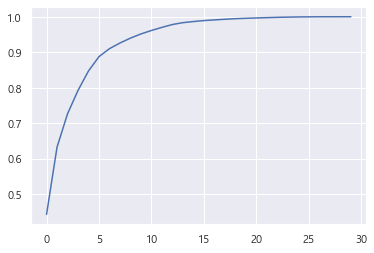

In [195]:
pca = PCA(n_components = 30)
pca.fit(X_scaled)
## 2개의 주성분을 출력
X_pca = pca.transform(X_scaled)
print(pca.explained_variance_ratio_)
# 28 개의 특성을 제거 
print('원본 데이터 형태:{}'.format(str(X_scaled.shape)))
print('축소된 데이터 형채:{}'.format(str(X_pca.shape)))
plt.plot(np.cumsum(pca.explained_variance_ratio_))  # elbow를 시각적으로 확인 
# 평행이 되는 시점에서 끊어야한다. 

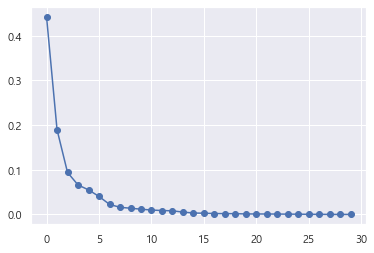

In [196]:
plt.plot(pca.explained_variance_ratio_, 'bo-')

In [204]:
scaler = StandardScaler()  # z점수 정규화 
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
pca.fit(X_train_scaled)
X_t_train = pca.transform(X_train_scaled)
X_t_test = pca.transform(X_test_scaled)
svm.fit(X_t_train, y_train)
print('SVM 테스트 정확도:{:.2f}'.format(svm.score(X_t_test, y_test)))
## 굳이 3퍼센트 때문에 30개를 다 쓸필요가 없다. 

SVM 테스트 정확도:0.92


C:\Users\ICT01_12\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [206]:
print('PCA  주성분 형태 :{}'.format(pca.components_.shape))

# 주성분을 30개의 변수가 설명하고 있다. 
# 30개의 변수가 영향을 미쳐서 새로운 축을 만들었다. 
# 변수의 기여도를 보고 명명식을 해야한다. 


PCA  주성분 형태 :(6, 30)


In [207]:
print('PCA 주성분:{}'.format(pca.components_))

PCA 주성분:[[ 2.27727952e-01  1.15125429e-01  2.34880866e-01  2.29368295e-01
   1.34257906e-01  2.37160022e-01  2.57472643e-01  2.60831732e-01
   1.28883480e-01  4.44771262e-02  2.05926703e-01  1.45035459e-02
   2.10480600e-01  2.02438009e-01  1.01867571e-02  1.64939913e-01
   1.53175867e-01  1.78415012e-01  2.46122358e-02  9.25782919e-02
   2.32908159e-01  1.12324737e-01  2.40809688e-01  2.29457569e-01
   1.22454525e-01  2.08303026e-01  2.29910791e-01  2.49291962e-01
   1.15240250e-01  1.26763277e-01]
 [-2.15362267e-01 -6.01602111e-02 -1.97386080e-01 -2.12242935e-01
   1.93714685e-01  1.61665826e-01  6.56584195e-02 -2.40618685e-02
   1.88332406e-01  3.77871193e-01 -9.33235914e-02  1.04195564e-01
  -8.12542149e-02 -1.40402031e-01  2.19281447e-01  2.51896246e-01
   2.15694850e-01  1.53310362e-01  1.93854431e-01  3.02040600e-01
  -2.10358120e-01 -5.51038409e-02 -1.91044086e-01 -2.09342024e-01
   1.56961739e-01  1.32043594e-01  8.62556801e-02 -1.22824865e-02
   1.09276647e-01  2.71509521e-01

C:\Users\ICT01_12\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_12\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


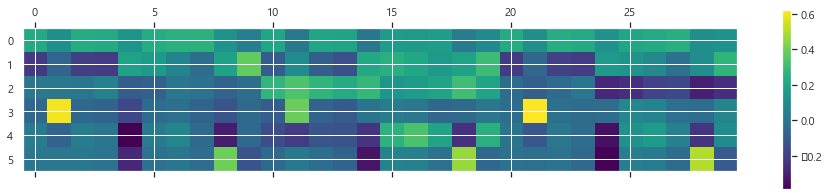

In [209]:
plt.matshow(pca.components_, cmap= 'viridis')
plt.colorbar()

(87, 65)


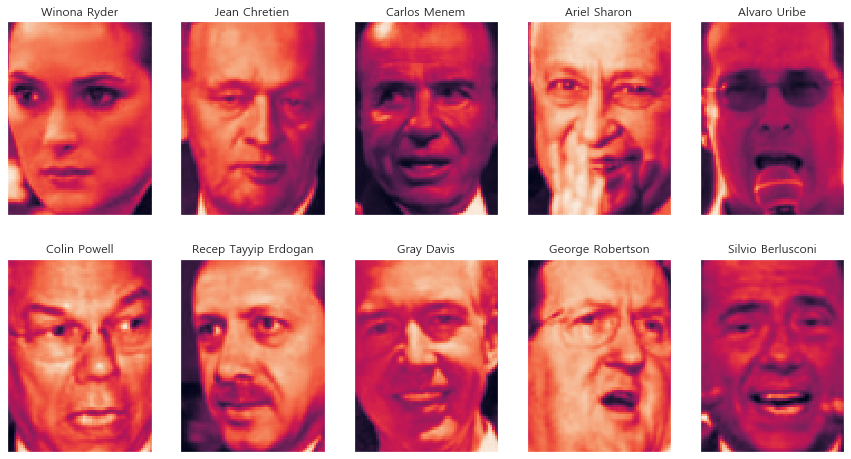

In [211]:
%matplotlib inline
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
people = fetch_lfw_people(min_faces_per_person = 20, resize = 0.7)
image_shape = people.images[0].shape
print(image_shape)   # 87*65 -->  이미지를 읽을때는 가로* 세로 인데 행렬로 읽으면 행부터 읽으므로 87이 세로 
fig, axes = plt.subplots(2,5,figsize = (15,8), subplot_kw={'xticks':(), 'yticks':()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [212]:
print('이미지 사이즈:{}'.format(people.images.shape))
print('클래스 개수:{}'.format(len(people.target_names)))

이미지 사이즈:(3023, 87, 65)
클래스 개수:62


In [213]:
mask = np.zeros(people.target.shape, dtype =np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]]= 1
X_people = people.data[mask]
y_people = people.target[mask]
X_people = X_people/255.

In [214]:
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify = y_people, random_state = 0)

In [216]:
from sklearn.decomposition import PCA
pca = PCA(n_components =100 , whiten = True, random_state = 0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

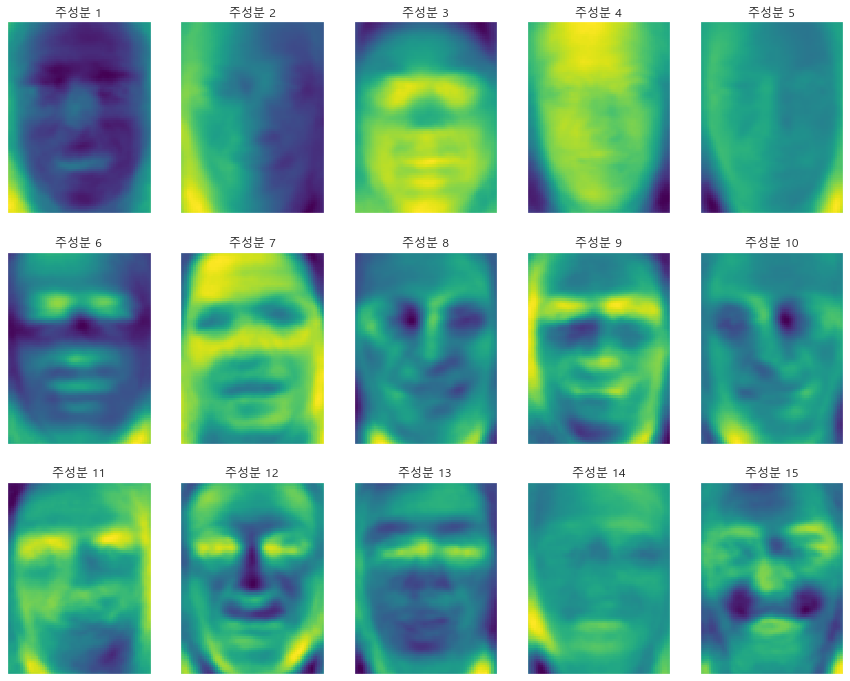

In [220]:
fig, axes = plt.subplots(3,5, figsize = (15,12), 
                        subplot_kw = {'xticks':(), 'yticks':()})
for i , (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap = 'viridis')
    ax.set_title('주성분 {}'.format((i+1)))

In [ ]:
# 컴퓨터가 주성분분석을 통해 찾아낸 주성분
- 100개의 주성분을 합하여 출력하면 원본 이미지가 나타난다
- 나머지는 필요 없는 성분. 
- ANN==>의 가중치 특징도 설명할수 없다. (컴퓨터만 알고 있음. )
- 설명은 안되지만 사용가능. 